In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

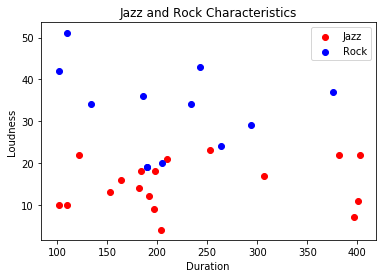

In [55]:
# Learning via similarity (regression listed as learning via errors, ask why)
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [56]:
obs = [190, 24]
neighbors = 1
distances = []
points = []

for i in range(len(music)):
    neighbor = list(music.iloc[i,0:2])
    distance = np.sqrt((neighbor[0]-obs[0])**2 + (neighbor[1]-obs[1])**2)
    distances.append(distance)
    points.append(neighbor)
    
nearest_neighbor = distances.index(min(distances))
print(music.iloc[nearest_neighbor].jazz)

0


In [57]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']] # feature set
Y = music.jazz
neighbors.fit(X,Y)

# predict based on feature values (24 loudness, 190 seconds duration)
neighbors.predict([[24, 190]])

array([0])